<a href="https://colab.research.google.com/github/jhkr1/PythonML/blob/main/01_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Linear Regression
### 공부 시간에 따른 시험 점수

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/PythonMLWokrspace/ScikitLearn/LinearRegressionData.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PythonMLWokrspace/ScikitLearn/LinearRegressionData.csv'

In [ ]:
dataset.tail()

,hour,score
15,6.9,58
16,7.2,76
17,8.4,86
18,8.6,90
19,10.0,100


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # 학습


LinearRegression()

In [ ]:
y_pred = reg.predict(X) # X에 대한 예측값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

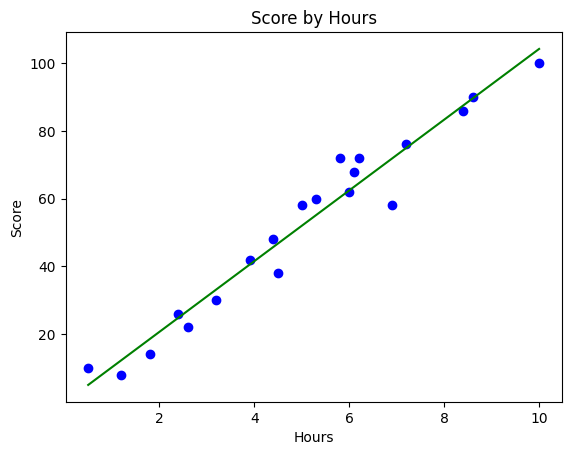

In [ ]:
plt.scatter(X, y, color = 'blue') # 산점도
plt.plot(X, y_pred, color = 'green') # 선
plt.title('Score by Hours')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [ ]:
print('9시간 공부했을 때 예상 공부시간: ', reg.predict([[9]]))

9시간 공부했을 때 예상 공부시간:  [93.77478776]


In [ ]:
reg.coef_ # 기울기

array([10.44369694])

In [ ]:
reg.intercept_ # y절편

-0.218484702867201

In [ ]:
x = 9
y = 10.44369694 * x + -0.218484702867201
print(y)

93.7747877571328


## 데이터 세트 분리

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/PythonMLWokrspace/ScikitLearn/LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X = dataset.iloc[:, :-1].values # 독립 변수
y = dataset.iloc[:, -1].values  # 종속 변수

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 훈련 8, 테스트 2

In [ ]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [ ]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [ ]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [ ]:
y, len(y)
y_train, len(y_train)
y_test, len(y_test)

(array([ 90,   8, 100,  38]), 4)

## 분리된 데이터를 통한 모델링

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) # 훈련 세트로 학습


LinearRegression()

### 데이터 시각화(훈련세트)

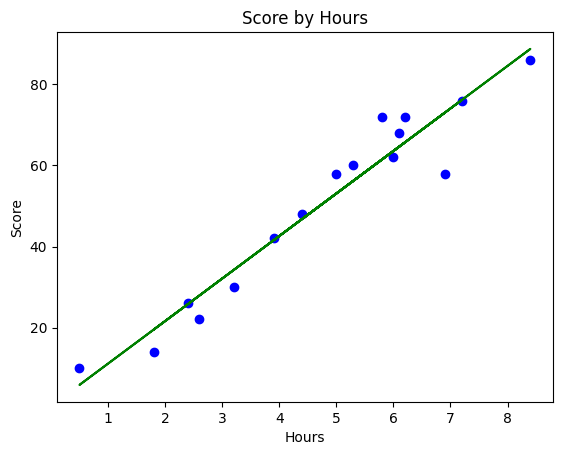

In [ ]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, model.predict(X_train), color = 'green')
plt.title('Score by Hours(train data)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

### 데이터 시각화(테스트 세트)

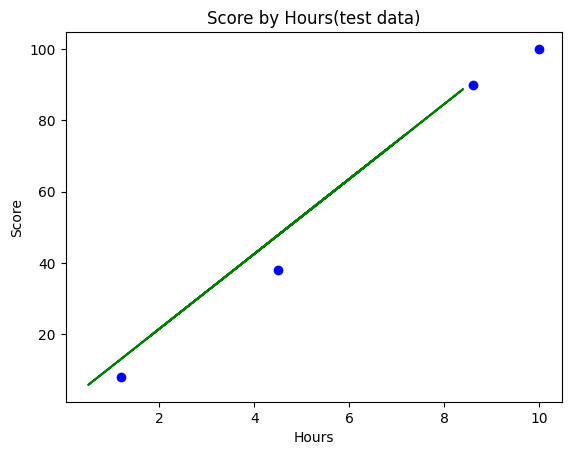

In [ ]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, model.predict(X_train), color = 'green')
plt.title('Score by Hours(test data)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [ ]:
model.coef_ # 기울기
model.intercept_ # y 절편

0.6115562905169369

### 모델 평가

In [ ]:
model.score(X_train, y_train) # 1에 가까울수록 좋음

0.9356663661221668

In [ ]:
model.score(X_test, y_test)

0.9727616474310156

## 경사 하강법(Gradient Descent)

max_iter: 훈련 세트 반복 횟수 (Epoch 횟수)

eta0: 학습률(learning rate)

In [ ]:
from sklearn.linear_model import SGDRegressor # SGD: Stochastic Gradient Desent: 확률적 경사 하강법
# sr = SGDRegressor(max_iter=1000, eta0=1e-4, random_state=0, verbose=1)
sr = SGDRegressor()

# 지수 표기법
# 1e-3 == 0.001(10^-3)
sr.fit(X_train, y_train)

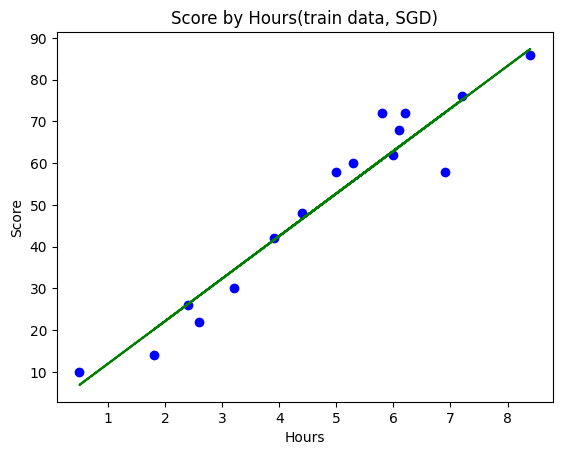

In [ ]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, sr.predict(X_train), color = 'green')
plt.title('Score by Hours(train data, SGD)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [ ]:
sr.coef_, sr.intercept_

(array([10.35844675]), array([1.64942198]))

In [ ]:
sr.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9700548800243479

In [ ]:
sr.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9351972741581044